Extracción de Caracterísitcas --- Clustering
===

* 60:00 min | Última modificación: Abril 5, 2021 | [YouTube]()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
from sklearn import datasets
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [6]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

Text(0, 0.5, 'Sepal Width')

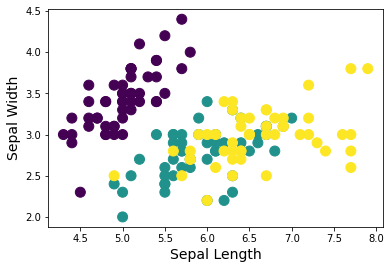

In [7]:
plt.scatter(X[:,0], X[:, 1], c=y, s=100)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)

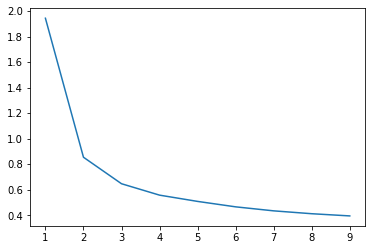

In [9]:
mean_dist = []
max_k = 10

for k in range(1, max_k):
    km = KMeans(n_clusters=k, random_state=12345)
    km.fit(X)
    mean_dist.append(
        sum(np.min(cdist(X, km.cluster_centers_, "euclidean"), axis=1)) / X.shape[0]
    )

plt.plot(range(1, max_k), mean_dist)

In [10]:
km = KMeans(n_clusters=3, random_state=12345)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Predicted')

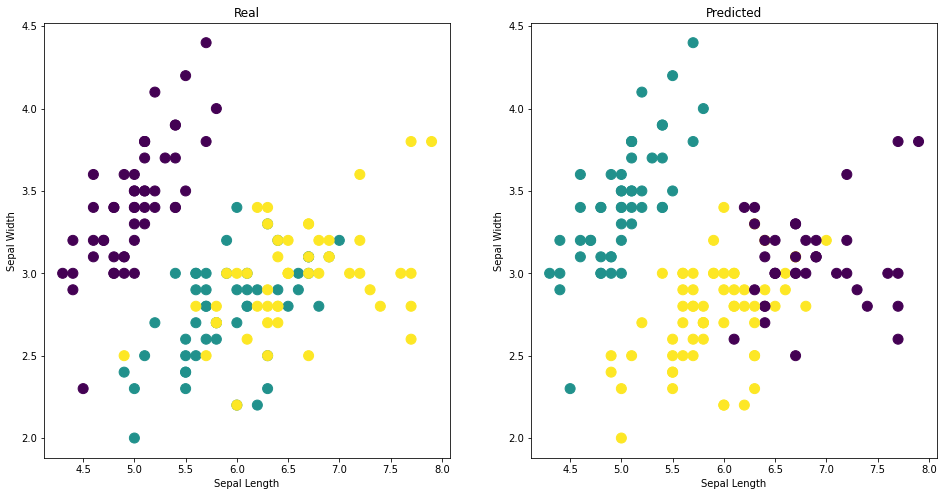

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].scatter(X[:, 0], X[:, 1], c=y, s=100)
ax[0].set_xlabel('Sepal Length')
ax[0].set_ylabel('Sepal Width')
ax[0].set_title('Real')

ax[1].scatter(X[:, 0], X[:, 1], c=km.labels_, s=100)
ax[1].set_xlabel('Sepal Length')
ax[1].set_ylabel('Sepal Width')
ax[1].set_title('Predicted')

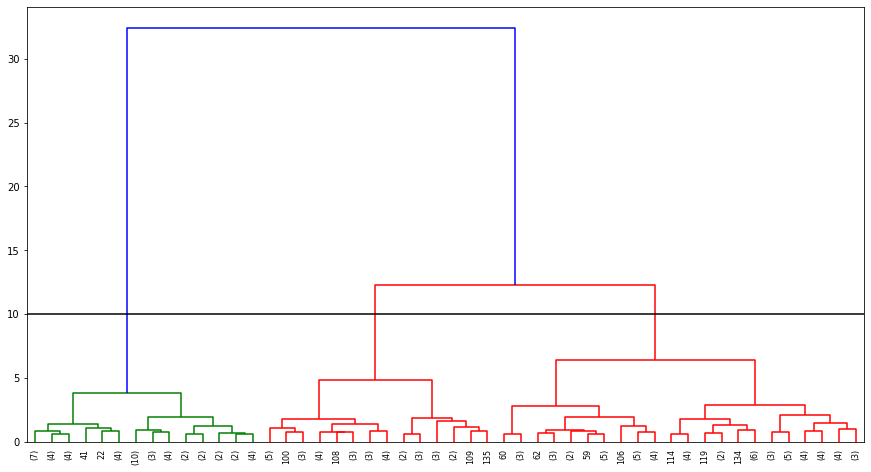

In [19]:
#
# Clustering jerarquico
#
from scipy.cluster.hierarchy import dendrogram, linkage

L = linkage(X, 'ward')

plt.figure(figsize=(15, 8))

dendrogram(L, truncate_mode='lastp', p=50)
plt.axhline(y=10, c='k')
plt.show()